In [23]:
import pandas as pd

c11 = pd.read_csv("CalmingSubject11.csv")
c11['n_back'].value_counts()

n_back
One Back Task \n\n Press TARGET if current letter is same as the previous letter\n\n            176
Three Back Task \n\n Press TARGET if current letter is same as the third previous letter\n\n    176
Rest                                                                                              1
Name: count, dtype: int64

In [3]:
v11 = pd.read_csv("VexingSubject11.csv")
v11

,TrialNumber,n_back,Stimulus_Letter,Response_Time,Correct_Response,Response
0,1,One Back Task \n\n Press TARGET if current let...,L,0.0,3.0,NaN
1,1,One Back Task \n\n Press TARGET if current let...,Q,0.0,3.0,NaN
2,1,One Back Task \n\n Press TARGET if current let...,U,318.0,3.0,3.0
3,1,One Back Task \n\n Press TARGET if current let...,O,98.0,3.0,3.0
4,1,One Back Task \n\n Press TARGET if current let...,U,271.0,3.0,3.0
...,...,...,...,...,...,...
348,17,One Back Task \n\n Press TARGET if current let...,R,905.0,3.0,3.0
349,17,One Back Task \n\n Press TARGET if current let...,B,157.0,3.0,3.0
350,17,One Back Task \n\n Press TARGET if current let...,F,97.0,3.0,3.0
351,17,One Back Task \n\n Press TARGET if current let...,E,0.0,3.0,NaN


In [13]:
participant_data = {}
import re

files = ["CalmingSubject11.csv","CalmingSubject3.csv","CalmingSubject4.csv","CalmingSubject6.csv","CalmingSubject8.csv",
        "VexingSubject11.csv","VexingSubject3.csv","VexingSubject4.csv","VexingSubject6.csv","VexingSubject8.csv"]

for file in files:
    # Read the CSV
    df = pd.read_csv(file)
    
    # Extract metadata from filename
    session = "Calming" if "Calming" in file else "Vexing"
    subject_id = re.search(r"Subject(\d+)", file).group(1)
    
    # Add participant ID column
    df["participant_id"] = f"Subject{subject_id}"
    
    # Add correctness column
    df["correct"] = (df["Response"] == df["Correct_Response"]).astype(int)
    
    # Add session label
    df["session_type"] = session
    
    # Clean the n_back column
    df["n_back"] = df["n_back"].replace({
        "One Back Task \n\n Press TARGET if current letter is same as the previous letter\n\n": "1-Back",
        "Three Back Task \n\n Press TARGET if current letter is same as the third previous letter\n\n": "3-Back"
    })
    
    # Combine per participant
    key = f"Subject{subject_id}"
    if key not in participant_data:
        participant_data[key] = df
    else:
        participant_data[key] = pd.concat([participant_data[key], df], ignore_index=True)

# Combine all participants into a single DataFrame
combined_df = pd.concat(participant_data.values(), ignore_index=True)
combined_df

,TrialNumber,n_back,Stimulus_Letter,Response_Time,Correct_Response,Response,participant_id,correct,session_type
0,1,One Back Task \n\n Press TARGET if current let...,L,0.0,3.0,NaN,Subject11,0,Calming
1,1,One Back Task \n\n Press TARGET if current let...,A,487.0,3.0,3.0,Subject11,1,Calming
2,1,One Back Task \n\n Press TARGET if current let...,E,222.0,3.0,3.0,Subject11,1,Calming
3,1,One Back Task \n\n Press TARGET if current let...,E,189.0,4.0,4.0,Subject11,1,Calming
4,1,One Back Task \n\n Press TARGET if current let...,E,74.0,4.0,4.0,Subject11,1,Calming
...,...,...,...,...,...,...,...,...,...
3525,17,One Back Task \n\n Press TARGET if current let...,R,61.0,3.0,3.0,Subject8,1,Vexing
3526,17,One Back Task \n\n Press TARGET if current let...,B,134.0,3.0,3.0,Subject8,1,Vexing
3527,17,One Back Task \n\n Press TARGET if current let...,F,316.0,3.0,3.0,Subject8,1,Vexing
3528,17,One Back Task \n\n Press TARGET if current let...,E,291.0,3.0,3.0,Subject8,1,Vexing


In [15]:
combined_df[combined_df["participant_id"]=="Subject11"]

,TrialNumber,n_back,Stimulus_Letter,Response_Time,Correct_Response,Response,participant_id,correct,session_type
0,1,One Back Task \n\n Press TARGET if current let...,L,0.0,3.0,NaN,Subject11,0,Calming
1,1,One Back Task \n\n Press TARGET if current let...,A,487.0,3.0,3.0,Subject11,1,Calming
2,1,One Back Task \n\n Press TARGET if current let...,E,222.0,3.0,3.0,Subject11,1,Calming
3,1,One Back Task \n\n Press TARGET if current let...,E,189.0,4.0,4.0,Subject11,1,Calming
4,1,One Back Task \n\n Press TARGET if current let...,E,74.0,4.0,4.0,Subject11,1,Calming
...,...,...,...,...,...,...,...,...,...
701,17,One Back Task \n\n Press TARGET if current let...,R,905.0,3.0,3.0,Subject11,1,Vexing
702,17,One Back Task \n\n Press TARGET if current let...,B,157.0,3.0,3.0,Subject11,1,Vexing
703,17,One Back Task \n\n Press TARGET if current let...,F,97.0,3.0,3.0,Subject11,1,Vexing
704,17,One Back Task \n\n Press TARGET if current let...,E,0.0,3.0,NaN,Subject11,0,Vexing


In [20]:
# Clean the n_back column using literal string values from the data
combined_df["n_back"] = combined_df["n_back"].replace({
    "One Back Task \\n\\n Press TARGET if current letter is same as the previous letter\\n\\n": "1-Back",
    "Three Back Task \\n\\n Press TARGET if current letter is same as the third previous letter\\n\\n": "3-Back",
    "Rest": "Rest"
})

combined_df["n_back"].value_counts()

n_back
1-Back    1760
3-Back    1760
Rest        10
Name: count, dtype: int64

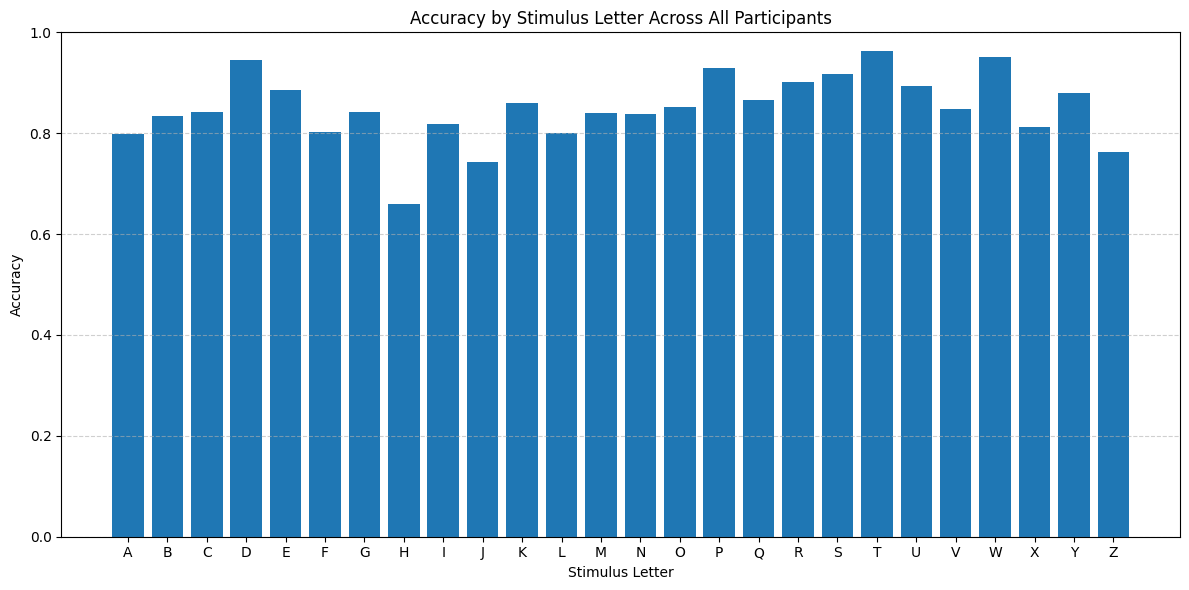

In [41]:
import matplotlib.pyplot as plt

# Filter rows with non-null Response and Correct_Response
filtered_df = combined_df.dropna(subset=["Response", "Correct_Response", "Stimulus_Letter"])

# Group by letter and compute accuracy
accuracy_by_letter = (
    filtered_df.groupby("Stimulus_Letter")["correct"]
    .mean()
    .sort_index()
    .reset_index()
)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(accuracy_by_letter["Stimulus_Letter"], accuracy_by_letter["correct"])
plt.xlabel("Stimulus Letter")
plt.ylabel("Accuracy")
plt.title("Accuracy by Stimulus Letter Across All Participants")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


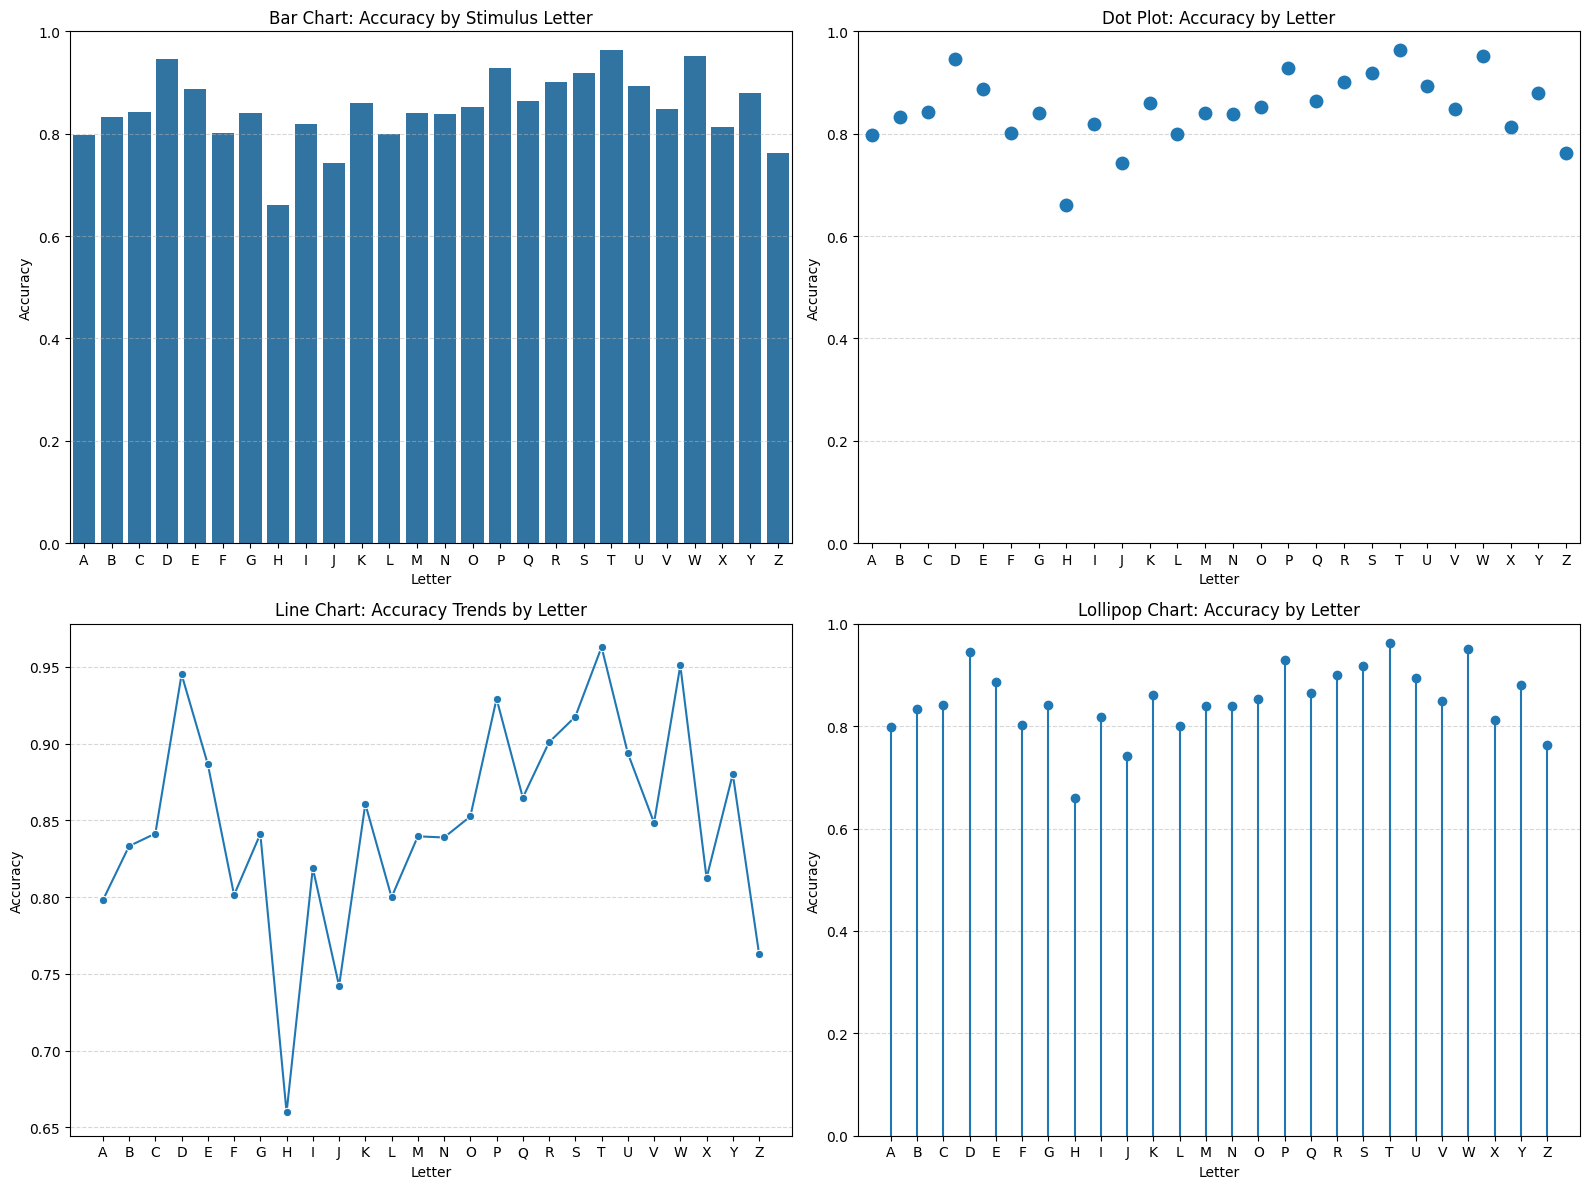

In [44]:
import seaborn as sns
import numpy as np

# Prepare the data again
filtered_df = combined_df.dropna(subset=["Response", "Correct_Response", "Stimulus_Letter"])
accuracy_by_letter = (
    filtered_df.groupby("Stimulus_Letter")["correct"]
    .mean()
    .sort_index()
    .reset_index()
)

# Sort letters alphabetically for consistent ordering
accuracy_by_letter = accuracy_by_letter.sort_values(by="Stimulus_Letter")

# Create multiple visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar Chart (baseline)
sns.barplot(data=accuracy_by_letter, x="Stimulus_Letter", y="correct", ax=axes[0, 0])
axes[0, 0].set_title("Bar Chart: Accuracy by Stimulus Letter")
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel("Accuracy")
axes[0, 0].set_xlabel("Letter")
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.5)

# 2. Dot Plot
sns.stripplot(data=accuracy_by_letter, x="Stimulus_Letter", y="correct", ax=axes[0, 1], size=10)
axes[0, 1].set_title("Dot Plot: Accuracy by Letter")
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].set_xlabel("Letter")
axes[0, 1].grid(axis="y", linestyle="--", alpha=0.5)

# 3. Line Chart
sns.lineplot(data=accuracy_by_letter, x="Stimulus_Letter", y="correct", marker="o", ax=axes[1, 0])
axes[1, 0].set_title("Line Chart: Accuracy Trends by Letter")
# axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_ylabel("Accuracy")
axes[1, 0].set_xlabel("Letter")
axes[1, 0].grid(axis="y", linestyle="--", alpha=0.5)

# 4. Lollipop Chart
axes[1, 1].stem(accuracy_by_letter["Stimulus_Letter"], accuracy_by_letter["correct"], basefmt=" ")
axes[1, 1].set_title("Lollipop Chart: Accuracy by Letter")
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_ylabel("Accuracy")
axes[1, 1].set_xlabel("Letter")
axes[1, 1].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

In [36]:
# Remove single quotes from all values in the Stimulus_Letter column
combined_df["Stimulus_Letter"] = combined_df["Stimulus_Letter"].astype(str).str.replace("'", "", regex=False)

# Display cleaned unique values to confirm fix
sorted(combined_df["Stimulus_Letter"].dropna().unique())

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'nan']

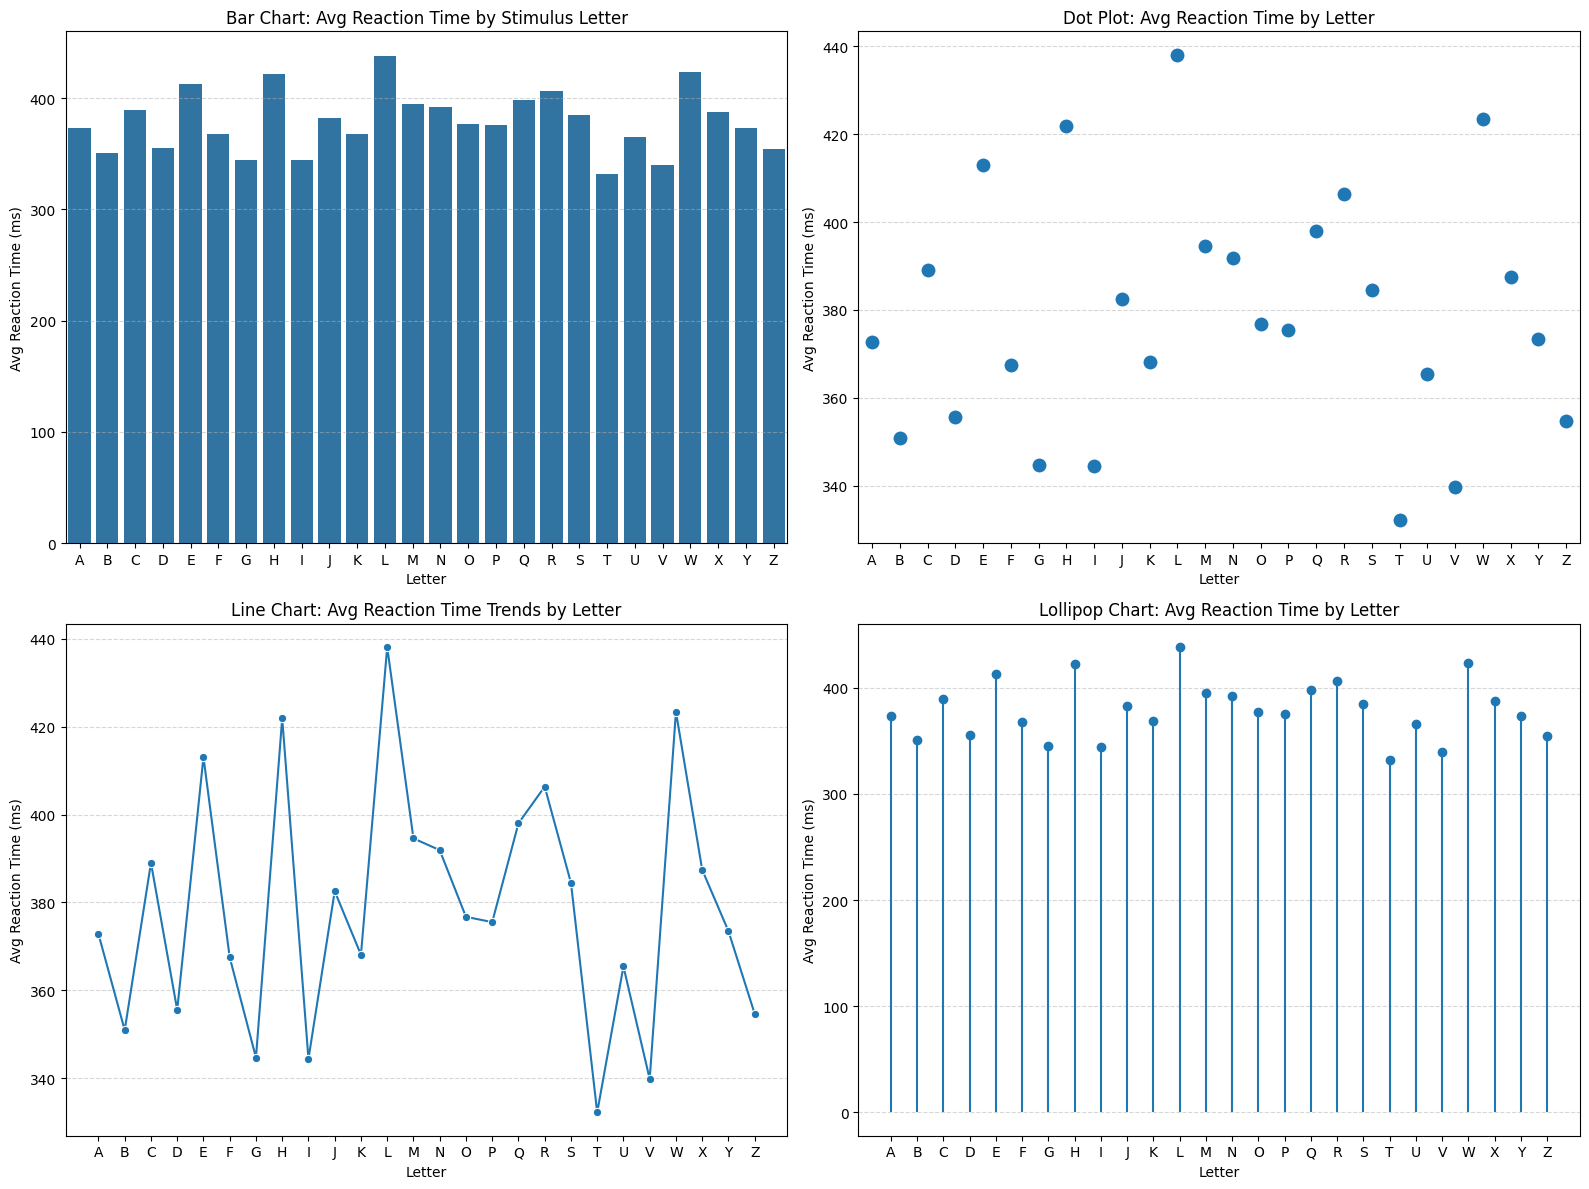

In [43]:
# Group by letter and compute average response time (excluding missing responses)
reaction_time_by_letter = (
    filtered_df.dropna(subset=["Response_Time"])  # ensure only valid response times
    .groupby("Stimulus_Letter")["Response_Time"]
    .mean()
    .sort_index()
    .reset_index()
)

# Create multiple visualizations for reaction time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar Chart
sns.barplot(data=reaction_time_by_letter, x="Stimulus_Letter", y="Response_Time", ax=axes[0, 0])
axes[0, 0].set_title("Bar Chart: Avg Reaction Time by Stimulus Letter")
axes[0, 0].set_ylabel("Avg Reaction Time (ms)")
axes[0, 0].set_xlabel("Letter")
axes[0, 0].grid(axis="y", linestyle="--", alpha=0.5)

# 2. Dot Plot
sns.stripplot(data=reaction_time_by_letter, x="Stimulus_Letter", y="Response_Time", size=10, ax=axes[0, 1])
axes[0, 1].set_title("Dot Plot: Avg Reaction Time by Letter")
axes[0, 1].set_ylabel("Avg Reaction Time (ms)")
axes[0, 1].set_xlabel("Letter")
axes[0, 1].grid(axis="y", linestyle="--", alpha=0.5)

# 3. Line Chart
sns.lineplot(data=reaction_time_by_letter, x="Stimulus_Letter", y="Response_Time", marker="o", ax=axes[1, 0])
axes[1, 0].set_title("Line Chart: Avg Reaction Time Trends by Letter")
axes[1, 0].set_ylabel("Avg Reaction Time (ms)")
axes[1, 0].set_xlabel("Letter")
axes[1, 0].grid(axis="y", linestyle="--", alpha=0.5)

# 4. Lollipop Chart
axes[1, 1].stem(reaction_time_by_letter["Stimulus_Letter"], reaction_time_by_letter["Response_Time"], basefmt=" ")
axes[1, 1].set_title("Lollipop Chart: Avg Reaction Time by Letter")
axes[1, 1].set_ylabel("Avg Reaction Time (ms)")
axes[1, 1].set_xlabel("Letter")
axes[1, 1].grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

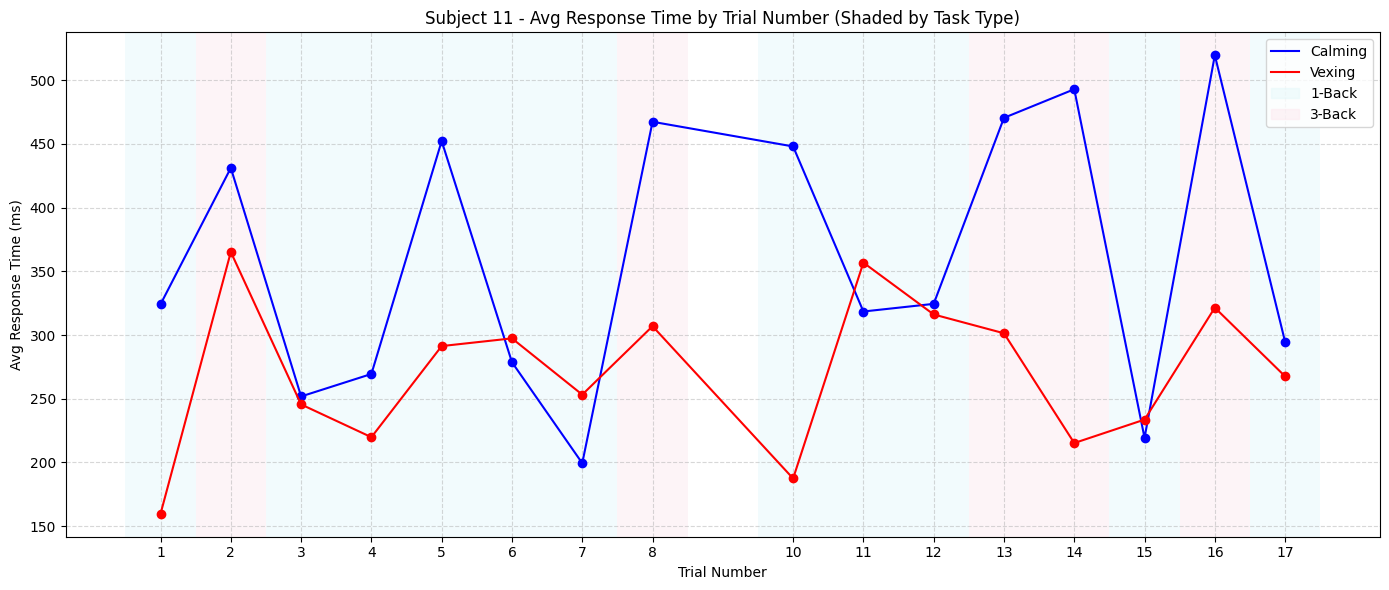

In [45]:
# Recreate cleaned subset for Subject11
subject11_df = combined_df[
    (combined_df["participant_id"] == "Subject11") &
    (combined_df["Response_Time"].notna())
].copy()

# Group by TrialNumber and session_type
avg_rt_by_trial = (
    subject11_df.groupby(["TrialNumber", "n_back", "session_type"])["Response_Time"]
    .mean()
    .reset_index()
    .sort_values("TrialNumber")
)

# Pivot for line plot
pivot_df = avg_rt_by_trial.pivot(index="TrialNumber", columns="session_type", values="Response_Time")

# Extract n_back info for each trial (they are the same across sessions)
n_back_mapping = avg_rt_by_trial.drop_duplicates(subset=["TrialNumber"])[["TrialNumber", "n_back"]].set_index("TrialNumber")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(pivot_df.index, pivot_df["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_df.index, pivot_df["Vexing"], label="Vexing", color="red", marker="o")

# Shade regions based on n_back
for i in range(len(pivot_df.index)):
    trial = pivot_df.index[i]
    task_type = n_back_mapping.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Formatting
plt.title("Subject 11 - Avg Response Time by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Avg Response Time (ms)")
plt.xticks(pivot_df.index)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Add legend for shaded background
legend_handles = [
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    plt.Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    plt.Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
]
plt.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

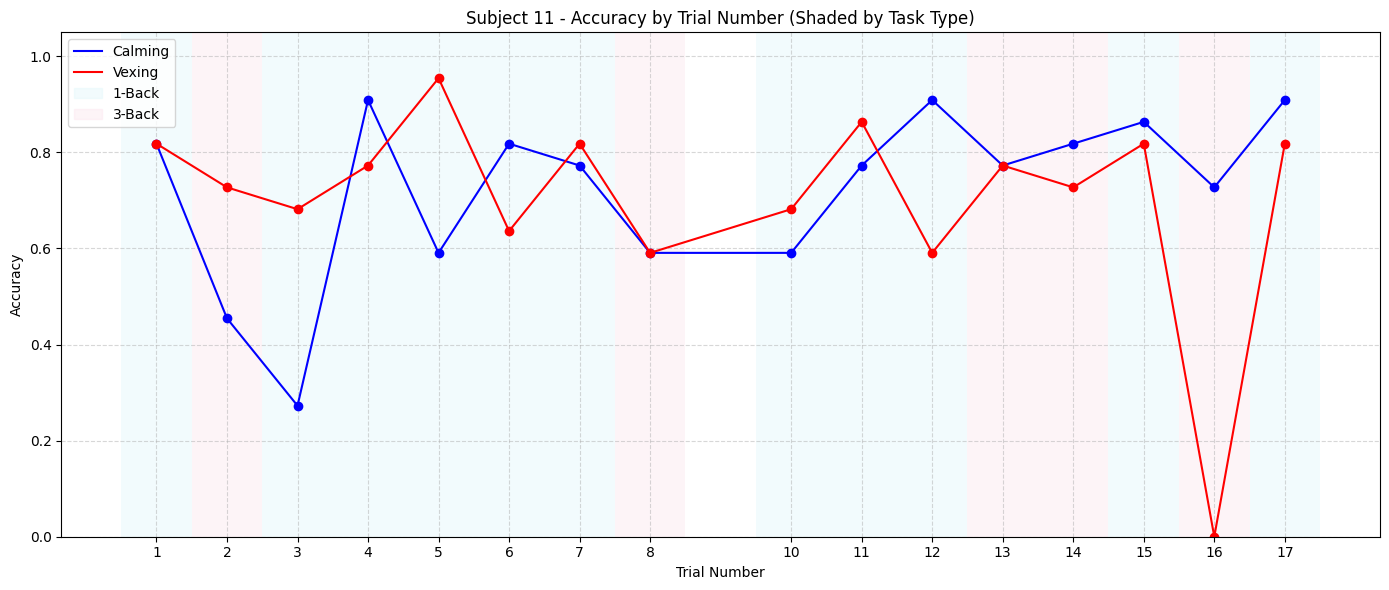

In [46]:
# Group by TrialNumber and session_type for accuracy
avg_acc_by_trial = (
    subject11_df.groupby(["TrialNumber", "n_back", "session_type"])["correct"]
    .mean()
    .reset_index()
    .sort_values("TrialNumber")
)

# Pivot for line plot
pivot_acc_df = avg_acc_by_trial.pivot(index="TrialNumber", columns="session_type", values="correct")

# Extract n_back info for shading
n_back_mapping_acc = avg_acc_by_trial.drop_duplicates(subset=["TrialNumber"])[["TrialNumber", "n_back"]].set_index("TrialNumber")

# Plot
plt.figure(figsize=(14, 6))
plt.plot(pivot_acc_df.index, pivot_acc_df["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_acc_df.index, pivot_acc_df["Vexing"], label="Vexing", color="red", marker="o")

# Shade by task type
for i in range(len(pivot_acc_df.index)):
    trial = pivot_acc_df.index[i]
    task_type = n_back_mapping_acc.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Formatting
plt.title("Subject 11 - Accuracy by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.xticks(pivot_acc_df.index)
plt.ylim(0, 1.05)
plt.grid(True, linestyle="--", alpha=0.5)

# Legends
legend_handles = [
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    plt.Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    plt.Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
]
plt.legend(handles=legend_handles)

plt.tight_layout()
plt.show()

TypeError: A single argument passed to legend() must be a list of labels, but found an Artist in there.

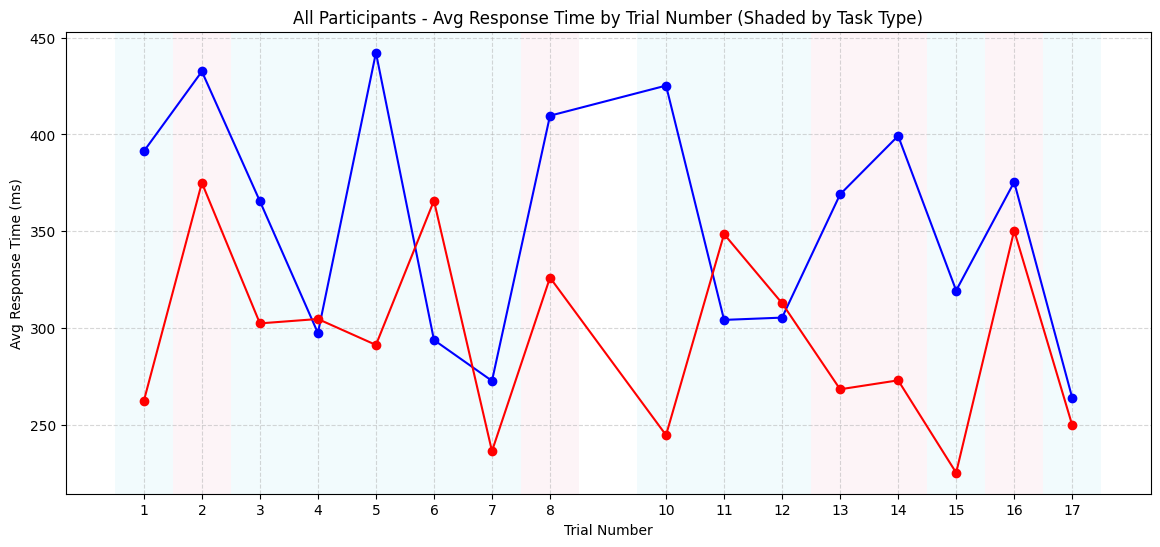

In [47]:
# Filter out rows with non-null response time and valid TrialNumber
valid_df = combined_df[
    combined_df["Response_Time"].notna() & 
    combined_df["TrialNumber"].notna()
].copy()

# Convert TrialNumber to int to ensure consistent grouping
valid_df["TrialNumber"] = valid_df["TrialNumber"].astype(int)

# --- Average Response Time Plot Across All Participants ---

# Group by TrialNumber, n_back, and session_type
avg_rt_all = (
    valid_df.groupby(["TrialNumber", "n_back", "session_type"])["Response_Time"]
    .mean()
    .reset_index()
    .sort_values("TrialNumber")
)

# Pivot to make columns for Calming and Vexing
pivot_rt_all = avg_rt_all.pivot(index="TrialNumber", columns="session_type", values="Response_Time")
n_back_rt = avg_rt_all.drop_duplicates(subset=["TrialNumber"])[["TrialNumber", "n_back"]].set_index("TrialNumber")

# Plot response time
plt.figure(figsize=(14, 6))
plt.plot(pivot_rt_all.index, pivot_rt_all["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_rt_all.index, pivot_rt_all["Vexing"], label="Vexing", color="red", marker="o")

# Shade by task type
for trial in pivot_rt_all.index:
    task_type = n_back_rt.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Labels and legend
plt.title("All Participants - Avg Response Time by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Avg Response Time (ms)")
plt.xticks(pivot_rt_all.index)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend([
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    plt.Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    plt.Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
])
plt.tight_layout()
plt.show()

# --- Accuracy Plot Across All Participants ---

# Group by TrialNumber, n_back, and session_type
avg_acc_all = (
    valid_df.groupby(["TrialNumber", "n_back", "session_type"])["correct"]
    .mean()
    .reset_index()
    .sort_values("TrialNumber")
)

# Pivot to make columns for Calming and Vexing
pivot_acc_all = avg_acc_all.pivot(index="TrialNumber", columns="session_type", values="correct")
n_back_acc = avg_acc_all.drop_duplicates(subset=["TrialNumber"])[["TrialNumber", "n_back"]].set_index("TrialNumber")

# Plot accuracy
plt.figure(figsize=(14, 6))
plt.plot(pivot_acc_all.index, pivot_acc_all["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_acc_all.index, pivot_acc_all["Vexing"], label="Vexing", color="red", marker="o")

# Shade by task type
for trial in pivot_acc_all.index:
    task_type = n_back_acc.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Labels and legend
plt.title("All Participants - Accuracy by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(pivot_acc_all.index)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend([
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    plt.Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    plt.Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
])
plt.tight_layout()
plt.show()


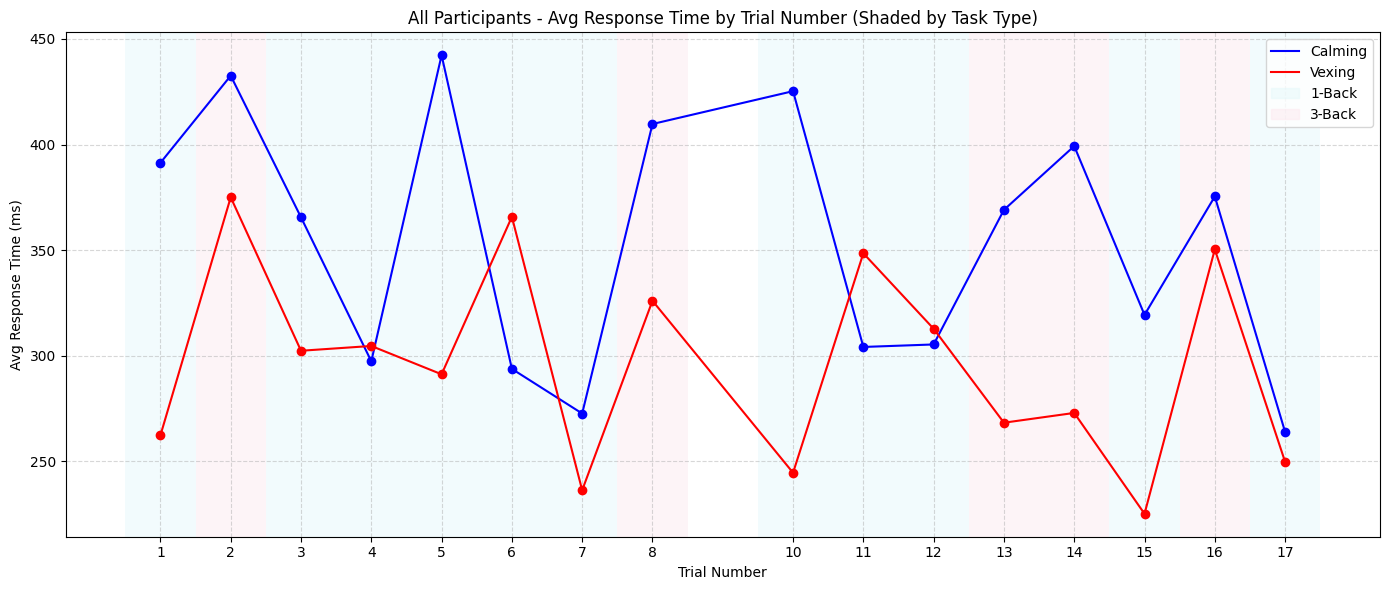

NameError: name 'pivot_acc_all' is not defined

<Figure size 1400x600 with 0 Axes>

In [48]:
# Recreate and replot response time and accuracy graphs with fixed legend handling

from matplotlib.patches import Rectangle

# --- Replot: Avg Response Time ---

plt.figure(figsize=(14, 6))
plt.plot(pivot_rt_all.index, pivot_rt_all["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_rt_all.index, pivot_rt_all["Vexing"], label="Vexing", color="red", marker="o")

# Shading by n-back task type
for trial in pivot_rt_all.index:
    task_type = n_back_rt.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Labels, ticks, legend
plt.title("All Participants - Avg Response Time by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Avg Response Time (ms)")
plt.xticks(pivot_rt_all.index)
plt.grid(True, linestyle="--", alpha=0.5)
legend_handles_rt = [
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
]
plt.legend(handles=legend_handles_rt)
plt.tight_layout()
plt.show()

# --- Replot: Accuracy ---

plt.figure(figsize=(14, 6))
plt.plot(pivot_acc_all.index, pivot_acc_all["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_acc_all.index, pivot_acc_all["Vexing"], label="Vexing", color="red", marker="o")

# Shading by n-back
for trial in pivot_acc_all.index:
    task_type = n_back_acc.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Labels, ticks, legend
plt.title("All Participants - Accuracy by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(pivot_acc_all.index)
plt.grid(True, linestyle="--", alpha=0.5)
legend_handles_acc = [
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
]
plt.legend(handles=legend_handles_acc)
plt.tight_layout()
plt.show()

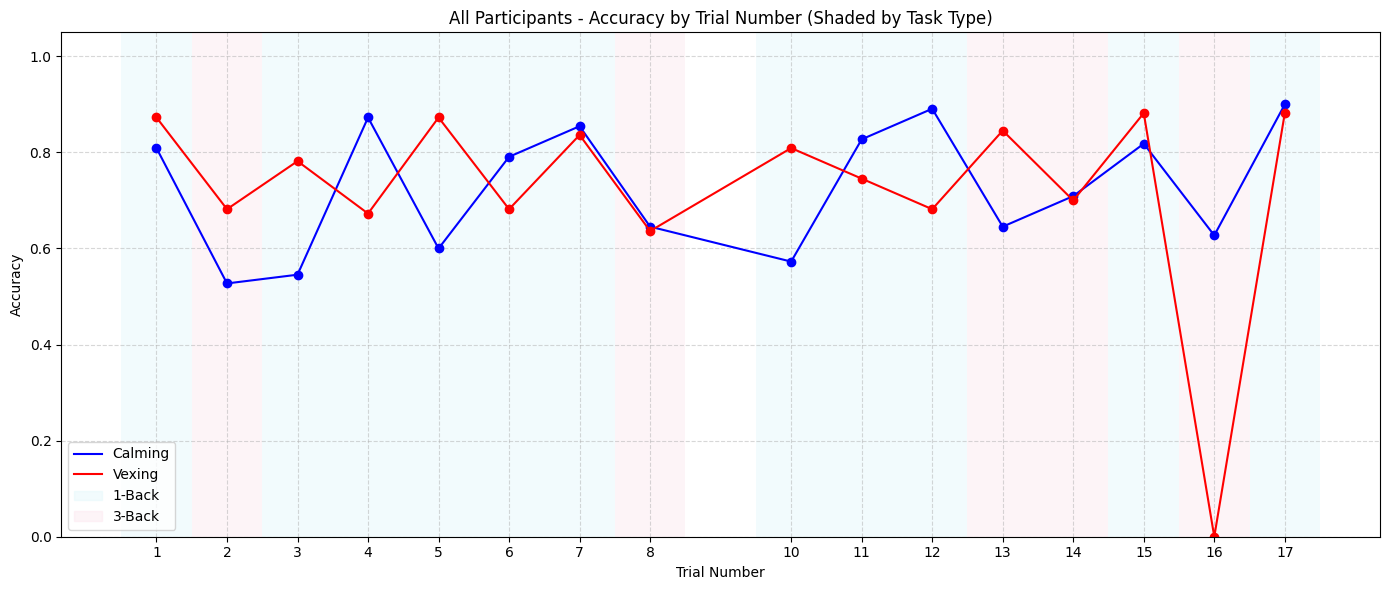

In [49]:
# Recompute accuracy summary in case variables were lost
avg_acc_all = (
    valid_df.groupby(["TrialNumber", "n_back", "session_type"])["correct"]
    .mean()
    .reset_index()
    .sort_values("TrialNumber")
)
pivot_acc_all = avg_acc_all.pivot(index="TrialNumber", columns="session_type", values="correct")
n_back_acc = avg_acc_all.drop_duplicates(subset=["TrialNumber"])[["TrialNumber", "n_back"]].set_index("TrialNumber")

# Replot: Accuracy by Trial Number (all participants)
plt.figure(figsize=(14, 6))
plt.plot(pivot_acc_all.index, pivot_acc_all["Calming"], label="Calming", color="blue", marker="o")
plt.plot(pivot_acc_all.index, pivot_acc_all["Vexing"], label="Vexing", color="red", marker="o")

# Shading by n-back
for trial in pivot_acc_all.index:
    task_type = n_back_acc.loc[trial, "n_back"]
    color = "#e0f7fa" if task_type == "1-Back" else "#fce4ec"
    plt.axvspan(trial - 0.5, trial + 0.5, facecolor=color, alpha=0.4)

# Formatting
plt.title("All Participants - Accuracy by Trial Number (Shaded by Task Type)")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.xticks(pivot_acc_all.index)
plt.grid(True, linestyle="--", alpha=0.5)
legend_handles = [
    plt.Line2D([0], [0], color="blue", label="Calming"),
    plt.Line2D([0], [0], color="red", label="Vexing"),
    Rectangle((0, 0), 1, 1, color="#e0f7fa", alpha=0.4, label="1-Back"),
    Rectangle((0, 0), 1, 1, color="#fce4ec", alpha=0.4, label="3-Back")
]
plt.legend(handles=legend_handles)
plt.tight_layout()
plt.show()

In [51]:
combined_df.to_csv("cleaned_df.csv")